In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
import pygraphviz
import ast
from IPython.display import Image, HTML
from collections import defaultdict
import operator

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
sp1235 = pd.read_csv('sp1235_graphs.csv', index_col='eid', tupleize_cols=True)
sp1237 = pd.read_csv('sp1237_graphs.csv', index_col='eid', tupleize_cols=True)

In [4]:
def StrToList(str):
    if str.startswith("{") and str.endswith("}"):
        return [ast.literal_eval(x) for x in str[1:-1].strip().split(",")]
    else:
        raise "StrToList error: str must be in the form {1,2,3,...}"

In [5]:
def DrawGraph(cur_record):
    n_nodes = cur_record.mc_n_vertices
    lund_list = StrToList(cur_record.mc_lund_id)
    from_list = StrToList(cur_record.mc_from_vertices)
    to_list = StrToList(cur_record.mc_to_vertices)
    G = nx.DiGraph()
    G.add_nodes_from([(x,{'label':y}) for x,y in zip(range(0, n_nodes), lund_list)])
    G.add_edges_from([(x,y) for x,y in zip(from_list,to_list)])
    return G

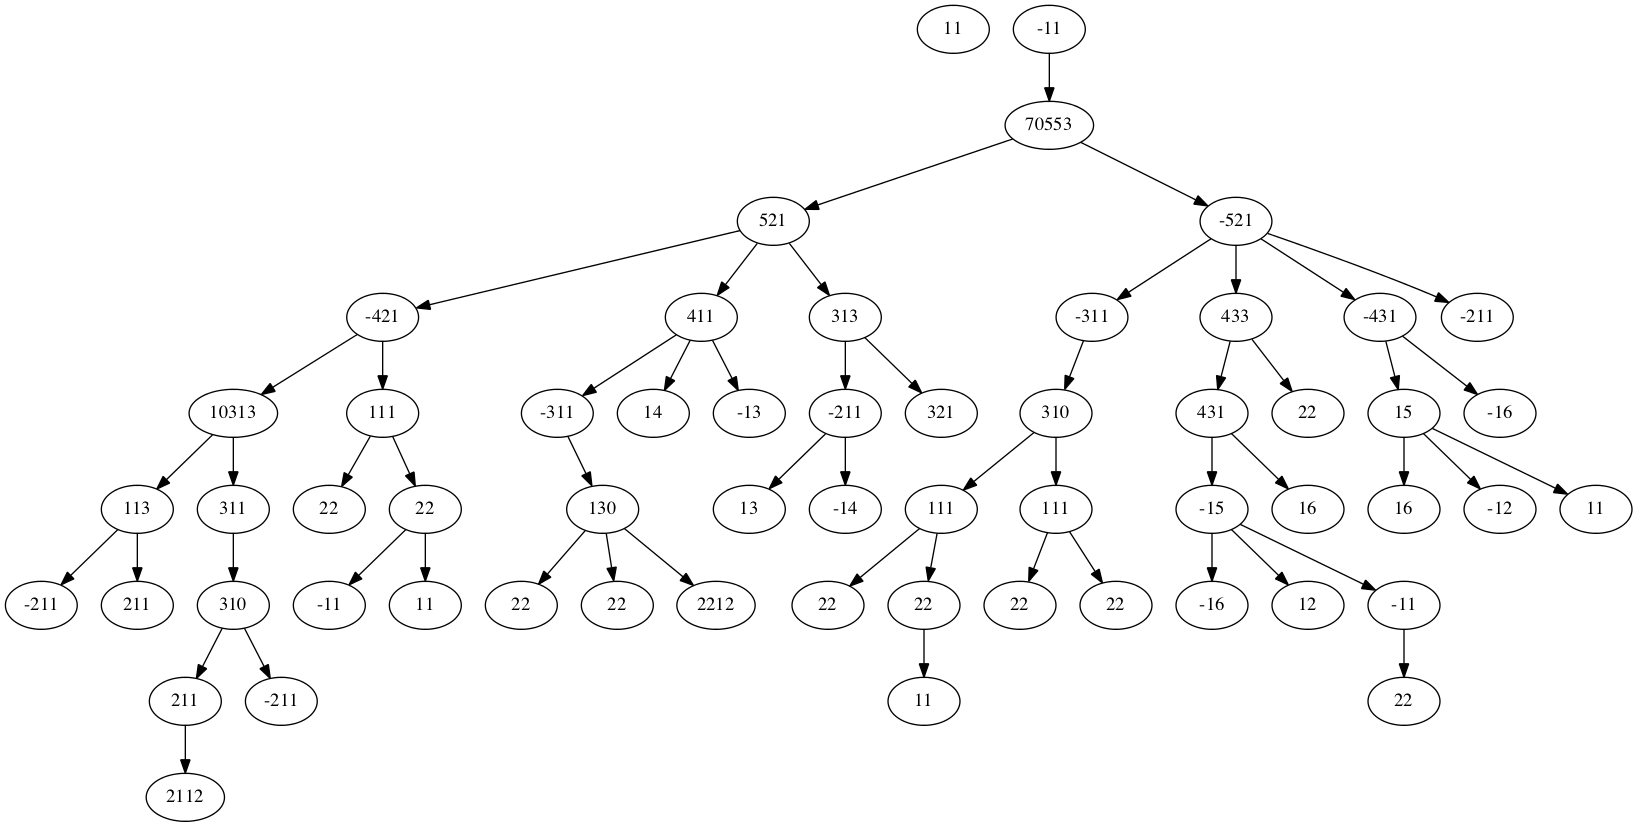

In [6]:
cur_eid = 28133632
cur_record = sp1235.loc[cur_eid]
G = DrawGraph(cur_record)
A = to_agraph(G)
A.draw('tmp.png', prog='dot')
Image(filename='tmp.png')

In [7]:
def GetBDecays(cur_record):
    n_nodes = cur_record.mc_n_vertices
    lund_list = StrToList(cur_record.mc_lund_id)
    from_list = StrToList(cur_record.mc_from_vertices)
    to_list = StrToList(cur_record.mc_to_vertices)

    b_indexes = [i for i,x in enumerate(lund_list) if abs(x) == 521 or abs(x) == 511]
    b_daus = []
    if len(b_indexes) != 2:
        raise AssertionError("There should be two B's in the event", len(b_indexes))
    for b in b_indexes:
        b_from = [i for i,x in enumerate(from_list) if x == b]
        b_daus.append(tuple(sorted([abs(lund_list[to_list[i]]) for i in b_from])))
    return b_daus

In [8]:
pdt = pd.read_table('pdt.dat', sep='\s+', names=['particle','lundID'])
lund_dict = dict([(i, name) for i, name in zip(pdt.lundID, pdt.particle)])

In [9]:
sp1235_b_decays = defaultdict(int)
for _, row in sp1235.head(1000).iterrows():
    b_modes =  GetBDecays(row)
    sp1235_b_decays[b_modes[0]] += 1
    sp1235_b_decays[b_modes[1]] += 1

In [10]:
b_decays_list_sp1235 = []
b_decays_count_sp1235 = []
for k,v in sorted(sp1235_b_decays.items(), key=operator.itemgetter(1), reverse = True):
    b_decays_list_sp1235.append(list(k))
    b_decays_count_sp1235.append(v)

In [11]:
sp1237_b_decays = defaultdict(int)
for _, row in sp1237.head(1000).iterrows():
    b_modes =  GetBDecays(row)
    sp1237_b_decays[b_modes[0]] += 1
    sp1237_b_decays[b_modes[1]] += 1

In [12]:
b_decays_list_sp1237 = []
b_decays_count_sp1237 = []
for k,v in sorted(sp1237_b_decays.items(), key=operator.itemgetter(1), reverse = True):
    b_decays_list_sp1237.append(list(k))
    b_decays_count_sp1237.append(v)

In [13]:
b_decays_names_sp1235 = [[lund_dict[x] for x in decay] for decay in b_decays_list_sp1235]
b_decays_names_sp1237 = [[lund_dict[x] for x in decay] for decay in b_decays_list_sp1237]
for d, c, e, f in zip(b_decays_names_sp1235, b_decays_count_sp1235, b_decays_names_sp1237, b_decays_count_sp1237):
    print '{0:40} {1:10} {2:40} {3}'.format(d,c,e,f)

['mu-', 'nu_mu', 'D*0']                         189 ['mu-', 'nu_mu', 'D*+']                  218
['e-', 'nu_e', 'D*0']                           175 ['e-', 'nu_e', 'D*+']                    137
['mu-', 'nu_mu', 'D0']                           81 ['e-', 'nu_e', 'gamma', 'D*+']           80
['e-', 'nu_e', 'gamma', 'D*0']                   66 ['mu-', 'nu_mu', 'D+']                   70
['e-', 'nu_e', 'D0']                             55 ['e-', 'nu_e', 'D+']                     51
['tau-', 'nu_tau', 'D*0']                        45 ['D*+', 'D_s*+']                         51
['D*0', 'D_s*+']                                 37 ['tau-', 'nu_tau', 'D*+']                47
['D*0', 'D_s+']                                  32 ['mu-', 'nu_mu', 'gamma', 'D*+']         41
['e-', 'nu_e', 'gamma', 'D0']                    29 ['mu-', 'nu_mu', "D'_1+"]                27
['D*0', 'a_1+']                                  29 ['e-', 'nu_e', 'gamma', 'D+']            26
['mu-', 'nu_mu', "D'_10"]             